In [1]:
import numpy as np
import torch
from torch import nn
import pandas as pd
from matplotlib import pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import torchvision
from torchvision import transforms, datasets
from torchvision.transforms import ToTensor

In [2]:
print(torch.__version__)
print(torchvision.__version__)

2.1.0+cu121
0.16.0+cu121


In [3]:
# Setup training data

train_data = datasets.FashionMNIST(
    root = "data",
    train= True,
    download = True,
    transform = ToTensor(),
    target_transform = None

)

test_data = datasets.FashionMNIST(
    root = "data",
    train= False,
    download = True,
    transform = ToTensor(),
    target_transform = None

)

100%|██████████| 26421880/26421880 [00:02<00:00, 11187638.00it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 197479.06it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3783299.33it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 22824817.12it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [5]:
image, label = train_data[0]

In [6]:
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [7]:
class_name =train_data.classes
print(class_name)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [8]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [9]:
c,h,w=image.shape
print(f"Number of channels is:", c)
print(f"Height of image is:", h)
print(f"Width of image is:", w)

Number of channels is: 1
Height of image is: 28
Width of image is: 28


(-0.5, 27.5, 27.5, -0.5)

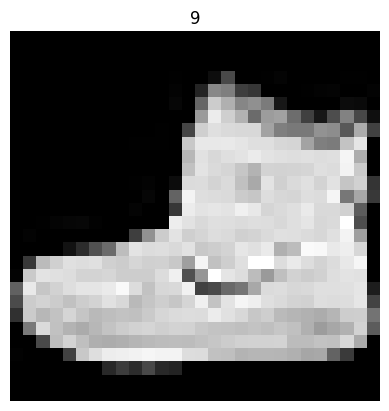

In [10]:
# Visualizing random samoles of data

image, label = train_data[0]
image.shape
plt.imshow(image.squeeze(), cmap = "gray")
plt.title(label)
plt.axis(False)


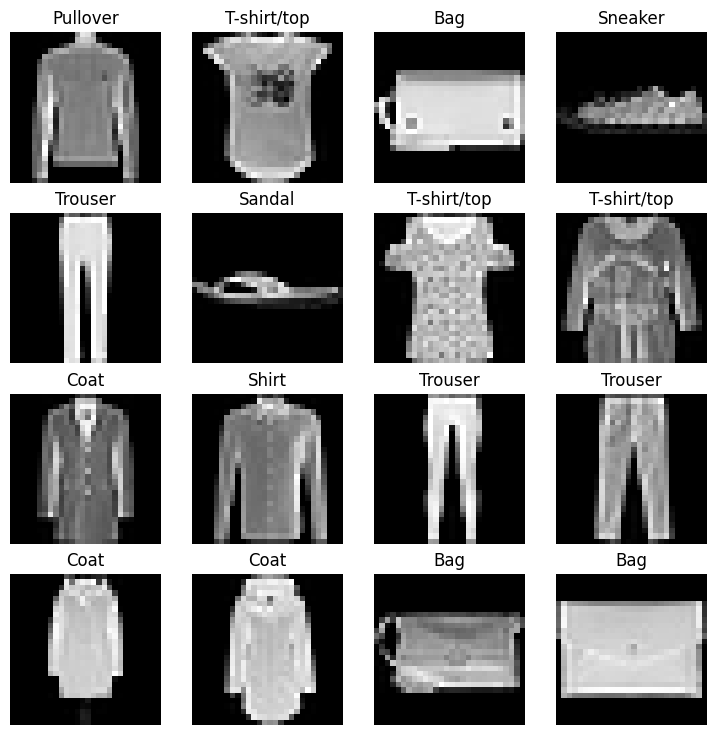

In [11]:
# plot more images

# torch.manual_seed(42)
fig = plt.figure(figsize =(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size =[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap= "gray")
  plt.title(class_name[label])
  plt.axis(False)

# Building dataloaders
Dataloaders turns our dataset into python iterables

More specifically, we want to turn our data into batches

Why should we do this??

1. It is more computionally efficent

2. It gives our neural netowrk more chances to update its gradient per epoch


In [12]:
from torch.utils.data import DataLoader

train_data_loader = DataLoader(dataset= train_data,
                               batch_size = 32,
                               shuffle = True)

test_data_loader = DataLoader(dataset = test_data,
                              batch_size =32,
                              shuffle = False)

train_data_loader,

(<torch.utils.data.dataloader.DataLoader at 0x792c2d411660>,)

Show a sample

In [13]:
train_features_batch, train_label_batch = next(iter(train_data_loader))
train_features_batch.shape, train_label_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

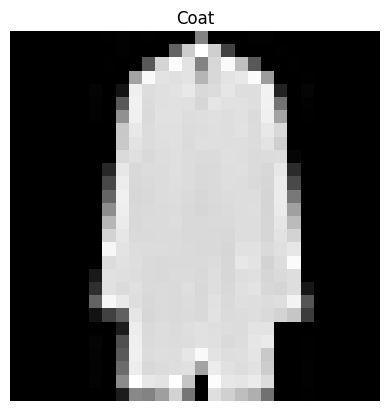

In [14]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_label_batch[random_idx]
plt.imshow(img.squeeze(), cmap = "gray")
plt.title(class_name[label])
plt.axis(False)

Creating a model with two linear layers

In [15]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
    def __init__(
        self,
        input_shape: int,
        hidden_units: int,
        output_shape: int,
    ):
        super(FashionMNISTModelV0, self).__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)


In [17]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape = 28 *28,
    hidden_units =10,
    output_shape = len(class_name)
)

model_0.to("cuda")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [18]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]],
                     device='cuda:0')),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163], device='cuda:0')),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0

In [19]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("Helper function already exists")
else:
  print("Downloading file")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_function.py", "wb") as f:
    f.write(request.content)




In [20]:
# import accuracy metric

from helper_function import accuracy_fn

In [21]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),lr =0.1)

In [22]:
loss_fn, optimizer

(CrossEntropyLoss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     lr: 0.1
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

Writing Training and Testing loops for batches of data

1. Loop through epochs
2. Loop through training batches, performing training steps, calculate the train loss per epoch.
3. Loop through testing batches, perform testing steps, calculate the test loss per batch.
4. Print out whats happening

Make predictions and get model0 results

In [30]:
model_0_results = eval_model(model_0, test_data_loader,
                             loss_fn, accuracy_fn)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 2.3190648555755615,
 'model_acc': 10.852635782747603,
 'precision': 0.061225434842004975,
 'recall': 0.1086,
 'f1': 0.04988891078673349}

In [28]:
from sklearn.metrics import precision_recall_fscore_support

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):

    loss, acc = 0, 0
    all_true_labels, all_predicted_labels = [], []

    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X = X.to("cuda")
            y = y.to("cuda")
            y_pred = model(X)

            # Use detach() to avoid in-place update error
            loss += loss_fn(y_pred, y).detach()
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

            all_true_labels.extend(y.cpu().numpy())
            all_predicted_labels.extend(y_pred.argmax(dim=1).cpu().numpy())

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    # Calculate Precision, Recall, and F1
    precision, recall, f1, _ = precision_recall_fscore_support(
        all_true_labels, all_predicted_labels, average='weighted', zero_division=0
    )

    return {
        "model_name": model.__class__.__name__,
        "model_loss": loss.item(),
        "model_acc": acc,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }


Model1 Creating a model with non linear functions

In [31]:
# class FashionMNISTModelV1(nn.Module):
#   def __init__(self,
#                input_shape:int,
#                hidden_units: int,
#                output_shape: int):
#      super().__init__()
#      self.layer_stack = nn.Sequential(
#          nn.Flatten(),
#          nn.Linear(in_features=input_shape,
#                    out_features= hidden_units),
#          nn.ReLU(),
#          nn.Linear(in_features=hidden_units,
#                    out_features= output_shape),
#          nn.ReLU()
#      )

#      def forwad(self, x:torch.Tensor):
#       return self.layer_stack(x)

model1 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(in_features=784,out_features=10),
    nn.ReLU(),
    nn.Linear(in_features=10,out_features=784),
    nn.ReLU(),

)



In [32]:
model1

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
  (2): ReLU()
  (3): Linear(in_features=10, out_features=784, bias=True)
  (4): ReLU()
)

In [40]:
def test_step(model, data_loader, loss_fn, accuracy_fn, device):
    test_loss, test_acc = 0, 0
    model.eval()

    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)

            test_pred = model(X)

            test_loss += loss_fn(test_pred, y)  # Clone the tensor
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test Loss: {test_loss:.3f} | Test acc: {test_acc:.2%}")


In [41]:
device = "cuda"
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):

    train_loss, train_acc = 0, 0
    model.train()

    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)

        y_pred = model(X)
        loss = loss_fn(y_pred, y)

        train_loss += loss.item()  # Change to loss.item()
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train Loss: {train_loss:.3f} | Train acc: {train_acc:.2%}")


In [ ]:
torch.manual_seed(42)
from tqdm import tqdm
epochs = 3
device = "cuda" if torch.cuda.is_available() else "cpu"
# Move the model to the desired device before the training loop
# model1 = model1.to(device)

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}")

    train_step(model=model1, data_loader=train_data_loader,
               loss_fn=loss_fn, optimizer=optimizer,
               accuracy_fn=accuracy_fn, device=device)

    test_step(model=model1, data_loader=test_data_loader,
              loss_fn=loss_fn, accuracy_fn=accuracy_fn,
              device=device)


In [ ]:
from torch import nn

class FashionMNISTModelV1(nn.Module):
    def __init__(
        self,
        input_shape: int,
        hidden_units: int,
        output_shape: int,
    ):
        super(FashionMNISTModelV1, self).__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x):
        return self.layer_stack(x)


In [174]:
model1 = FashionMNISTModelV1(784,10,784)
model1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=784, bias=True)
    (4): ReLU()
  )
)

In [133]:
28*28


784